## Fruits recognition using Tensorflow

The dataset used in this example is a preprocessed subset of the ALOI dataset:

https://aloi.science.uva.nl/

It contains images of common objects taken under different lighting consitions and angles

The code was adapted from the following Tensorflow tutorials:

https://www.tensorflow.org/tutorials/images/classification

https://www.tensorflow.org/tutorials/load_data/images


<img src="./fruits.png">

#### Imports

In [14]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

### Step 1) Get the Data
### Step 2) Split into training and test sets
### Step 3) Pre-process the data

#### Tensorflow can do the heavy lifting for all these steps!😀

In [3]:
batch_size = 32
img_height = 150
img_width = 150

data_dir = './data/fruits'

#### The 'image_dataset_from_directory' method loads data and assigns class labels based on subdirectories

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 360 files belonging to 5 classes.
Using 288 files for training.


In [16]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 360 files belonging to 5 classes.
Using 72 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['apple', 'banana', 'cherry', 'lemon', 'pineapple']


In [18]:
def PlotImages(images, labels):
    plt.figure(figsize=(10, 10))
    for im in range(len(images)):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

/root/my-conda-envs/tf_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


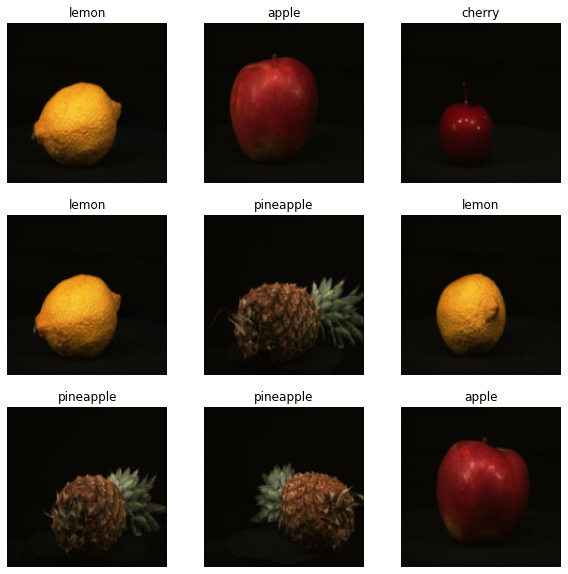

In [19]:
images, labels = next(train_ds.take(1).__iter__())

PlotImages(images,labels)

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Step 4) Train the ML model - here a Tensorflow Convolutional neural network

In [21]:
model = Sequential([
  Rescaling(1.0/255.0, input_shape=(img_height, img_width ,3)),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(5)
])


model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)       

In [22]:
epochs = 3
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/3
9/9 [==============================] - 5s 600ms/step - loss: 0.8884 - accuracy: 0.7743 - val_loss: 0.1340 - val_accuracy: 0.9444
Epoch 2/3
9/9 [==============================] - 5s 555ms/step - loss: 0.0331 - accuracy: 0.9861 - val_loss: 0.1423 - val_accuracy: 0.9583
Epoch 3/3
9/9 [==============================] - 5s 555ms/step - loss: 0.0482 - accuracy: 0.9757 - val_loss: 1.8495e-04 - val_accuracy: 1.0000


### Step 5) Test the model

In [23]:
test_images, true_labels = next(test_ds.take(1).__iter__())

model.evaluate(test_images, true_labels)

1/1 [==============================] - 0s 2ms/step - loss: 4.6329e-05 - accuracy: 1.0000


[4.63288051832933e-05, 1.0]

/root/my-conda-envs/tf_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


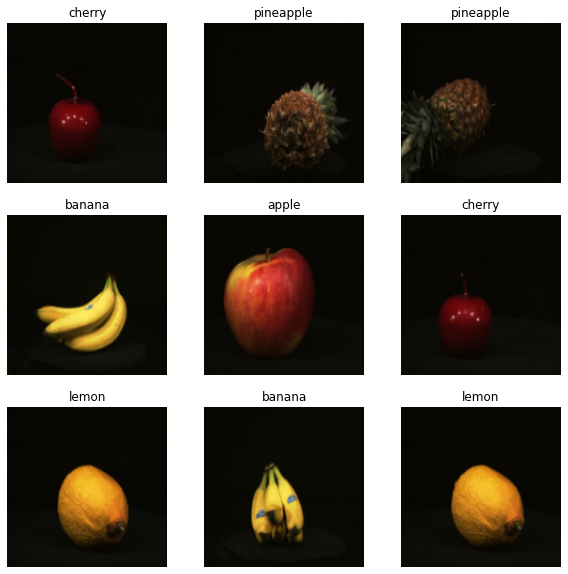

In [24]:
predicted_labels = np.argmax(model.predict(test_images), axis=1)

PlotImages(test_images[10:20],predicted_labels[10:20])